# Insurance Claims- Fraud Detection<br><br><br><br>
**Problem Statement:**<br><br>
**Business case:**<br><br>
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.<br><br>

In this project, there is a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. <br><br>

In this example, we are working with some auto insurance data to demonstrate how to create a predictive model that predicts if an insurance claim is fraudulent or not.<br><br><br><br>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Loading the dataset

In [3]:
df=pd.read_csv("insurance_dataset")

### Exploratory Data Analysis

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


This shows the first five rows of the dataset.

In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


This shows the last five rows of the dataset.

In [6]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns in the dataset.

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We can see the column names here.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This describes the information of the the columns of the dataset. It shows the column names, count and datatype.<br>
We can see that there are 2 columns of float64 datatype, 17 columns of int64 datatype and 21 columns of object datatype.

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values in the columns except in _c39. We can see that all the values in _c39 column are null

As all the values are null dropping the _c39 column.

In [10]:
# dropping _c39 column
df= df.drop('_c39', axis=1)

**Cleaning the data**

By observing the dataset, we can see that there are few '?' values. Here, I am replacing with NaN first and later checking the columns in which they exist, I will replace with suitable values accordingly.

In [11]:
df = df.replace('?',np.NaN)

In [12]:
#checking for null values after replacing '?' with NaN
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

We can see that the NaN values are found in collision_type, property_damage and police_report_available. Now I am going to replace these null values.

In [13]:
#replacing with most common collision type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

In [14]:
#filling property damage with 'No' because the damage might not be recorded when there was no damage reported
df['property_damage'].fillna('No', inplace = True)

In [15]:
# filling null values in police_report_available as 'No' because details should be available if there is a report filed.
df['police_report_available'].fillna('No', inplace = True)

In [16]:
#checking if the null values are removed now
df.isnull().any().any()

False

We can see that the null values are removed now.

**Analysing the data**

**--->Checking fraud_reported**

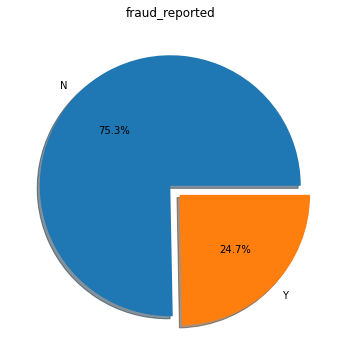

In [17]:
f,ax=plt.subplots(figsize=(12,6))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax,shadow=True)
plt.title('fraud_reported')
plt.ylabel('')
plt.show()

We can see that the fraud is reported in 24.7% claims.

**--->Checking insured_sex**

In [18]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

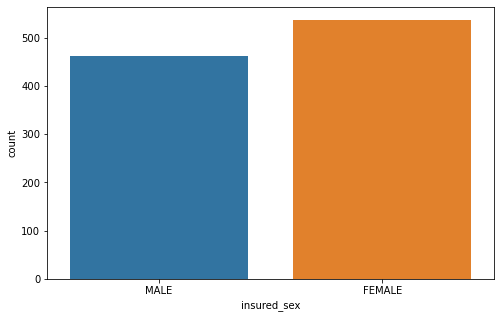

In [19]:
# plotting a bar plot
plt.figure(figsize=(8,5))
sns.countplot(x='insured_sex', data=df, order=['MALE', 'FEMALE'] )

We can see that the percentage of females insured is little greater that the percentage of males insured.

**Policy annual premium vs total claim amount**

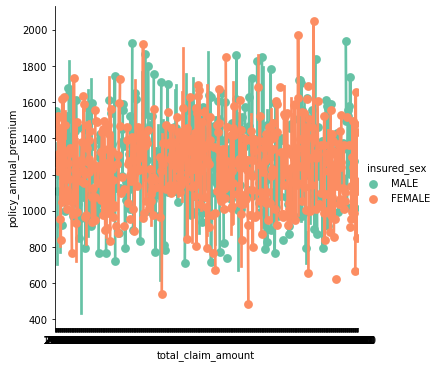

In [20]:
# plotting a factor plot
sns.factorplot('total_claim_amount','policy_annual_premium',hue='insured_sex',data=df, palette='Set2')
plt.show()

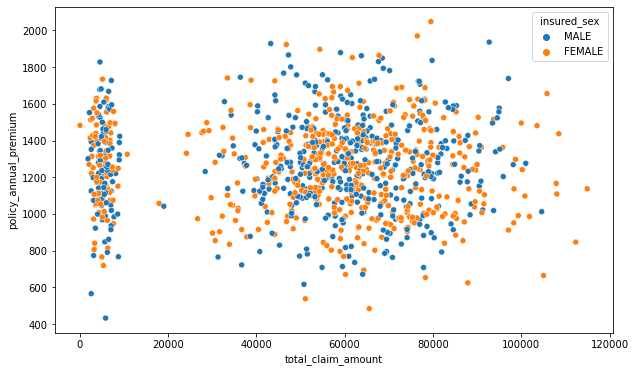

In [21]:
# plotting scatter plot
figure = plt.figure(figsize=(10,6))
sns.scatterplot(x="total_claim_amount",y="policy_annual_premium",hue="insured_sex", data=df)
plt.show()

**--->Checking Occupation**

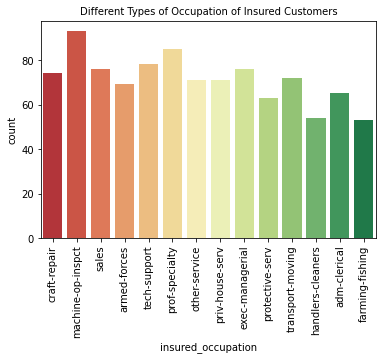

In [22]:
sns.countplot(df['insured_occupation'], palette = 'RdYlGn')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

**--->Checking Hobbies**

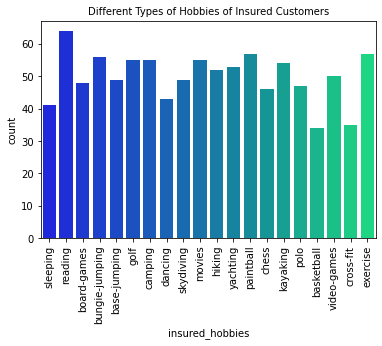

In [23]:
sns.countplot(df['insured_hobbies'], palette = 'winter')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

**--->Checking Education_Level**

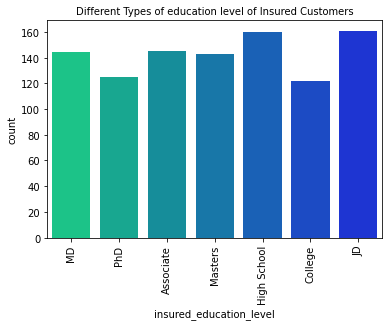

In [24]:
sns.countplot(df['insured_education_level'], palette = 'winter_r')
plt.title('Different Types of education level of Insured Customers', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

**--->Checking Policy State vs Total Claim Amount**

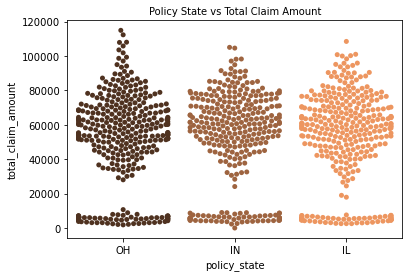

In [25]:
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 10)
plt.show()

**---> Checking types of Accidents**

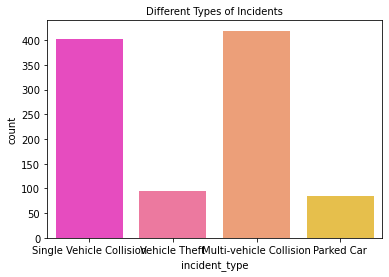

In [26]:
sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 10)
plt.show()

**--->Checking Relationship**

In [27]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

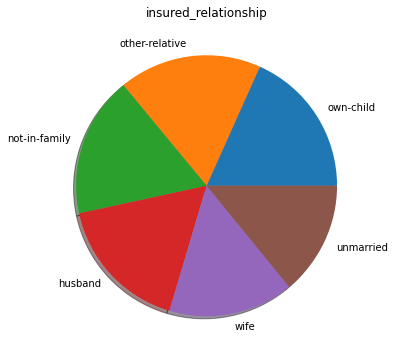

In [28]:
f,ax=plt.subplots(figsize=(12,6))
df['insured_relationship'].value_counts().plot.pie(ax=ax,shadow=True)
plt.title('insured_relationship')
plt.ylabel('')
plt.show()

### Data Pre-Processing

In [29]:
# let's extrat days, month and year from policy bind date

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [30]:
# Encoding the fraud report to numerical values

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))

In [31]:
# Checking the correlation of fraud_reported with the target

df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
38,X6,0.437500
32,Silverado,0.409091
24,ML350,0.400000
7,C300,0.388889
34,Tahoe,0.375000
14,F150,0.370370
10,Civic,0.363636
5,A5,0.343750
22,M5,0.333333
30,RAM,0.325581


In [32]:
# Target encoding for auto_make

df['auto_make'] = df['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.05,0.09, 0.10,0.12,0.12,0.13,0.15,0.15,0.15,0.16,0.16,0.18,0.19,0.20,0.22,0.23,0.24,0.24,0.26,
                 0.27,0.27,0.27,0.28,0.29,0.28,0.28,0.20,0.29,0.20,0.33,0.34,0.35,0.36,0.36,0.38,0.40,0.40,0.41,0.43))

In [33]:
# Checking the correlation auto make with the target

df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [34]:
# Target encoding for auto make

df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.16,0.18,0.19,0.20,0.23,0.26,0.24,0.25,0.27,0.27,0.28,0.30,0.30,0.33))

In [35]:
# Checking the correlation of police_report_available with the target

df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,No,0.259475
0,NO,0.250729
2,YES,0.229299


In [36]:
# let's perform target encoding for police_report_available

df['police_report_available'] = df['police_report_available'].replace(('NO','No','YES'),(0.25,0.25,0.22))

In [37]:
# Checking the correlation of property_damage with the target

df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,No,0.286111
2,YES,0.258278
0,NO,0.195266


In [38]:
# Target encoding for property damage

df['property_damage'] = df['property_damage'].replace(('NO','YES','No'),(0.19,0.25,0.28))

In [39]:
# CCheck the correlation of incident_city with the target

df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [40]:
# Target encoding for incident city

df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.22,0.22,0.23,0.24,0.24,0.26,0.28))


In [41]:
# let's check the correlation of incident_state with the target

df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [42]:
# let's perform target encoding for incident state

df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.17,0.22,0.22,0.26,0.29,0.30,0.43))

In [43]:
# let's check the correlation of authorities_contacted with the target

df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


In [44]:
# let's perform target encoding for authorities contacted

df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.06,0.20,0.26,0.29,0.31))

In [45]:
# Checkin the correlation of incident_severity with the target

df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
0,Major Damage,0.605072
2,Total Loss,0.128571
1,Minor Damage,0.107345
3,Trivial Damage,0.066667


In [46]:
# let's perform target encoding for incident severity

df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.06,0.10,0.12,0.60))

In [47]:
# let's check the correlation of collision_type with the target

df[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
0,Front Collision,0.275591
2,Side Collision,0.253623
1,Rear Collision,0.227660


In [48]:
# let's perform target encoding for collision type

df['collision_type'] = df['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.22,0.25,0.27))

In [49]:
# let's check the correlation of incident_type with the target

df[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
2,Single Vehicle Collision,0.290323
0,Multi-vehicle Collision,0.272076
1,Parked Car,0.095238
3,Vehicle Theft,0.085106


In [50]:
# Target encoding for incident type

df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.08, 0.09, 0.27,0.29))

# let's check the values
#data['incident_type'].value_counts()

In [51]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [52]:
# Checking relation between insured_relationship and fraud reported

df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
2,other-relative,0.293785
5,wife,0.270968
1,not-in-family,0.258621
4,unmarried,0.241135
3,own-child,0.213115
0,husband,0.205882


In [53]:
# Target encoding for insured relationship

df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.20,0.21,0.24,0.25,0.27,0.29))

In [54]:
# let's know the relation between insured_hobbies and fraud reported

df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [55]:
# let's perform target encoding for insured_hobbies

df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.09, 0.10,
                0.10, 0.12,0.13,0.16,0.18,0.18,0.20,0.20,0.22,0.22,0.23,0.23,0.23,0.27,0.29,0.30,0.74,0.82))

In [56]:
# let's know the relation between insured_occupation and fraud reported

df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [57]:
# let's perform target encoding for insured_occupation

df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.16, 0.15,0.17, 0.20,0.21,0.22,0.24,0.25,0.27,0.29,
                                                          0.29,0.30,0.30,0.36))

In [58]:
# let's know the relation of insured_education_level with faud_reported

df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [59]:
# lets know the relation of insured sex and fraud reported

df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
1,MALE,0.261339
0,FEMALE,0.234637


In [60]:
# target encoding for sex

df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.23,0.26))

In [61]:
# csl - combined single limit

'''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

# lets know the relation of policy state and fraud reported

df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [62]:
# target encoding for policy_csl

df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.21,0.25,0.26))

In [63]:
# lets know the relation of policy state and fraud reported

df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
2,OH,0.258523
1,IN,0.254839
0,IL,0.227811


In [64]:
# target encoding for policy_state

df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.22,0.25,0.25))

**Dropping unnecessary columns**

In [65]:
df = df.drop('policy_number', axis = 1)
df = df.drop('policy_bind_date', axis = 1)
df = df.drop('incident_date', axis = 1)
df = df.drop('incident_location', axis = 1)
df = df.drop('auto_model', axis = 1)

In [66]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,0.25,0.26,1000,1406.91,0,466132,0.26,MD,0.30,0.20,0.20,53300,0,0.29,0.25,0.6,0.20,0.29,0.26,5,1,0.25,1,2,0.22,71610,6510,13020,52080,0.23,2004,1,1,25
1,228,42,0.25,0.26,2000,1197.22,5000000,468176,0.26,MD,0.24,0.23,0.29,0,0,0.08,0.22,0.1,0.20,0.22,0.22,8,1,0.28,0,0,0.25,5070,780,780,3510,0.33,2007,1,1,21
2,134,29,0.25,0.25,2000,1413.14,5000000,430632,0.23,PhD,0.27,0.29,0.21,35100,0,0.27,0.22,0.1,0.20,0.22,0.26,7,3,0.19,2,3,0.25,34650,7700,3850,23100,0.24,2007,0,2,22
3,256,41,0.22,0.26,2000,1415.74,6000000,608117,0.23,PhD,0.25,0.29,0.24,48900,-62400,0.29,0.27,0.6,0.20,0.43,0.28,5,1,0.28,1,2,0.25,63400,6340,6340,50720,0.27,2014,1,10,1
4,228,44,0.22,0.21,1000,1583.91,6000000,610706,0.26,Associate,0.27,0.29,0.24,66000,-46000,0.08,0.22,0.1,0.06,0.22,0.28,20,1,0.19,0,1,0.25,6500,1300,650,4550,0.20,2009,0,2,17


We can see that the new columns are added.

In [67]:
df.shape

(1000, 36)

We can see that there are 1000 rows and 36 columns now.

In [68]:
df.isnull().sum().any()

False

We can see that there are no null values now.

**Correlation**

In [69]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
months_as_customer,1.000000,0.922098,0.004253,0.017037,0.026807,0.005018,0.015498,0.017895,0.060925,0.010889,0.044137,0.010056,0.006399,0.020209,0.043897,0.071583,0.026854,0.017128,-0.036664,-0.015984,0.070639,0.014736,-0.003577,-0.010162,0.058383,0.022146,0.062108,0.065329,0.034940,0.061013,0.054837,-0.000292,0.020544,0.024659,-0.011092
age,0.922098,1.000000,-0.021654,0.013358,0.029188,0.014404,0.018126,0.025604,0.073337,-0.015228,0.055575,0.015618,-0.007075,0.007368,0.045711,0.087612,0.032214,0.016937,-0.034640,-0.009961,0.087161,0.022102,-0.003313,-0.015679,0.052359,0.020441,0.069863,0.075522,0.060898,0.062588,0.046988,0.001354,0.012143,0.023404,-0.006131
policy_state,0.004253,-0.021654,1.000000,0.028161,-0.013938,0.009576,-0.031175,0.019313,-0.010625,-0.003866,0.001287,-0.012063,0.067828,-0.051001,-0.005424,-0.040041,0.008349,-0.014093,0.007362,-0.009188,0.015114,-0.048613,0.001985,-0.014711,0.023992,-0.059816,-0.002227,-0.032992,0.000147,0.005376,-0.012096,0.035093,0.031794,-0.010609,0.031675
policy_csl,0.017037,0.013358,0.028161,1.000000,-0.004301,-0.006243,0.003672,0.001525,0.058205,0.074928,-0.017872,0.000512,-0.000755,0.019392,0.030912,-0.029743,0.023325,0.040260,0.014389,0.017850,0.004702,0.011342,0.001390,-0.012051,-0.036586,-0.043594,0.012114,0.036037,0.005502,0.006216,0.018733,0.038515,0.045942,-0.013124,0.018676
policy_deductable,0.026807,0.029188,-0.013938,-0.004301,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.008456,-0.001964,-0.008224,0.035212,-0.023544,-0.002955,0.037026,0.006751,-0.028849,0.001557,0.015790,0.060935,0.051214,-0.003894,-0.022765,0.066639,-0.038036,0.022839,0.039107,0.064792,0.005269,-0.005734,0.026105,0.014817,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.009576,-0.006243,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.033569,-0.013379,-0.020917,-0.013738,0.023547,0.022452,-0.001605,-0.004310,0.021328,-0.064823,-0.062083,-0.001578,-0.045991,-0.036878,0.026780,0.002332,-0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.045660,-0.049226,-0.014480,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.031175,0.003672,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019730,0.048405,0.022446,-0.047268,-0.024056,-0.045477,-0.013838,-0.027517,-0.011595,0.020005,0.010676,-0.023257,-0.021270,-0.028840,0.022743,-0.006738,0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.009799,0.009893,0.058622,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.019313,0.001525,0.004545,0.032354,0.019671,1.000000,-0.036942,0.040648,0.012063,0.042262,0.006303,0.049372,-0.051261,-0.010623,0.016089,-0.023973,0.029455,-0.027832,0.008274,0.027448,-0.072567,0.028695,0.019805,-0.009841,-0.033873,-0.017495,-0.006841,-0.041083,0.018047,-0.032736,0.019368,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.010625,0.058205,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.006457,0.003473,0.015276,-0.020494,-0.021705,-0.021923,0.011075,0.027180,-0.009045,0.021707,-0.001269,0.019290,0.018793,-0.007411,-0.020297,0.042463,-0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.010633,-0.028247,0.030873,0.024227,-0.007280
insured_occupation,0.010889,-0.015228,-0.003866,0.074928,0.008456,-0.033569,-0.019730,0.040648,0.006457,1.000000,0.018875,0.056277,0.012271,-0.009427,0.046783,-0.009554,0.086329,0.034994,0.033214,-0.021315,0.022001,0.058847,0.056311,0.001789,0.021406,-0.034856,0.042714,0.039699,0.036427,0.040145,0.047935,0.006350,0.132117,0.010452,-0.070095


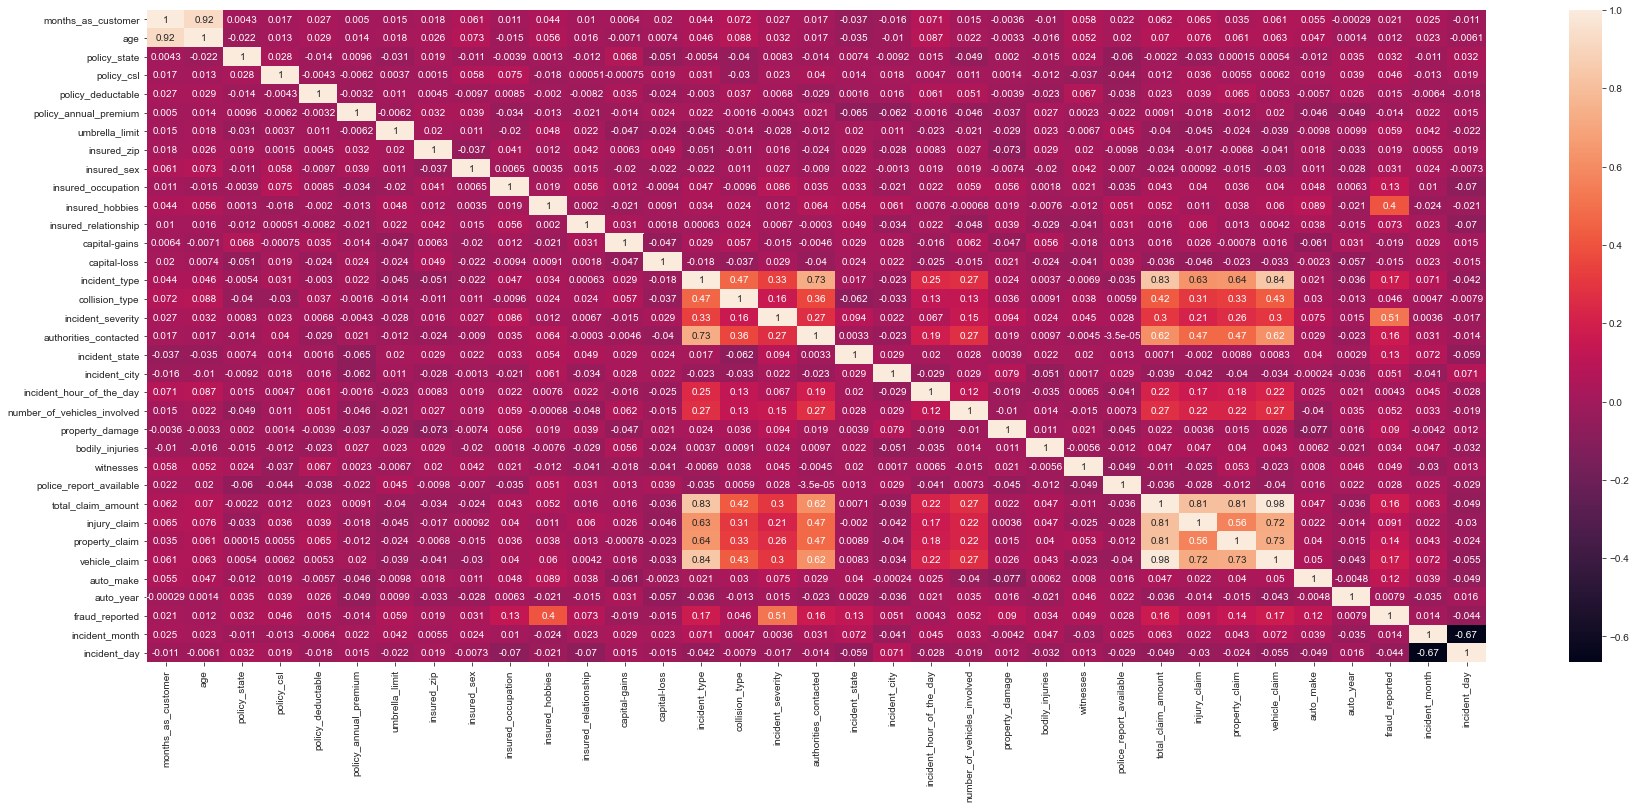

In [70]:
corr_data = df.corr()                    
plt.figure(figsize=(30, 12))                            
sns.set_style('ticks')                                  
sns.heatmap(corr_data, annot=True)      
plt.show()

The above heatmap shows the correlation between all the columns

In [71]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,38.948000,0.239860,0.241510,1136.000000,1256.406150,1.101000e+06,501214.488000,0.243890,0.244620,0.239070,0.242950,25126.100000,-26793.700000,0.245080,0.240980,0.240000,0.240060,0.241340,0.242490,11.644000,1.83900,0.24052,0.992000,1.487000,0.24058,52761.94000,7433.420000,7399.570000,37928.950000,0.246560,2005.103000,0.247000,3.407000,13.08400
std,115.113174,9.140287,0.014198,0.021059,611.864673,244.167395,2.297407e+06,71701.610941,0.014966,0.059331,0.173671,0.032069,27872.187708,28104.096686,0.075239,0.021064,0.222948,0.070498,0.055423,0.020345,6.951373,1.01888,0.03811,0.820127,1.111335,0.01393,26401.53319,4880.951853,4824.726179,18886.252893,0.047689,6.015861,0.431483,3.276291,10.44318
min,0.000000,19.000000,0.220000,0.210000,500.000000,433.330000,-1.000000e+06,430104.000000,0.230000,0.150000,0.090000,0.200000,0.000000,-111100.000000,0.080000,0.220000,0.060000,0.060000,0.170000,0.220000,0.000000,1.00000,0.19000,0.000000,0.000000,0.22000,100.00000,0.000000,0.000000,70.000000,0.160000,1995.000000,0.000000,1.000000,1.00000
25%,115.750000,32.000000,0.220000,0.210000,500.000000,1089.607500,0.000000e+00,448404.500000,0.230000,0.200000,0.130000,0.210000,0.000000,-51500.000000,0.270000,0.220000,0.100000,0.200000,0.220000,0.220000,6.000000,1.00000,0.19000,0.000000,1.000000,0.22000,41812.50000,4295.000000,4445.000000,30292.500000,0.200000,2000.000000,0.000000,1.000000,2.00000
50%,199.500000,38.000000,0.250000,0.250000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.230000,0.240000,0.210000,0.250000,0.000000,-23250.000000,0.270000,0.250000,0.120000,0.260000,0.220000,0.240000,12.000000,1.00000,0.25000,1.000000,1.000000,0.25000,58055.00000,6775.000000,6750.000000,42100.000000,0.260000,2005.000000,0.000000,2.000000,15.00000
75%,276.250000,44.000000,0.250000,0.260000,2000.000000,1415.695000,0.000000e+00,603251.000000,0.260000,0.290000,0.230000,0.270000,51025.000000,0.000000,0.290000,0.270000,0.600000,0.290000,0.290000,0.260000,17.000000,3.00000,0.28000,2.000000,2.000000,0.25000,70592.50000,11305.000000,10885.000000,50822.500000,0.280000,2010.000000,0.000000,5.000000,22.00000
max,479.000000,64.000000,0.250000,0.260000,2000.000000,2047.590000,1.000000e+07,620962.000000,0.260000,0.360000,0.820000,0.290000,100500.000000,0.000000,0.290000,0.270000,0.600000,0.310000,0.430000,0.280000,23.000000,4.00000,0.28000,2.000000,3.000000,0.25000,114920.00000,21450.000000,23670.000000,79560.000000,0.330000,2015.000000,1.000000,12.000000,31.00000


We can see the statistical desscription of the data here.

In [72]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.685977
policy_csl                    -0.746809
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_occupation             0.067860
insured_hobbies                2.444184
insured_relationship           0.046982
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                 -1.632336
collision_type                 0.222152
incident_severity              0.986279
authorities_contacted         -1.305659
incident_state                 0.724749
incident_city                  0.669708
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.383651
bodily_injuries                0.014777
witnesses                      0.019636


We can see that there is moderate skewness in the data. This will not affect the data much.

<AxesSubplot:>

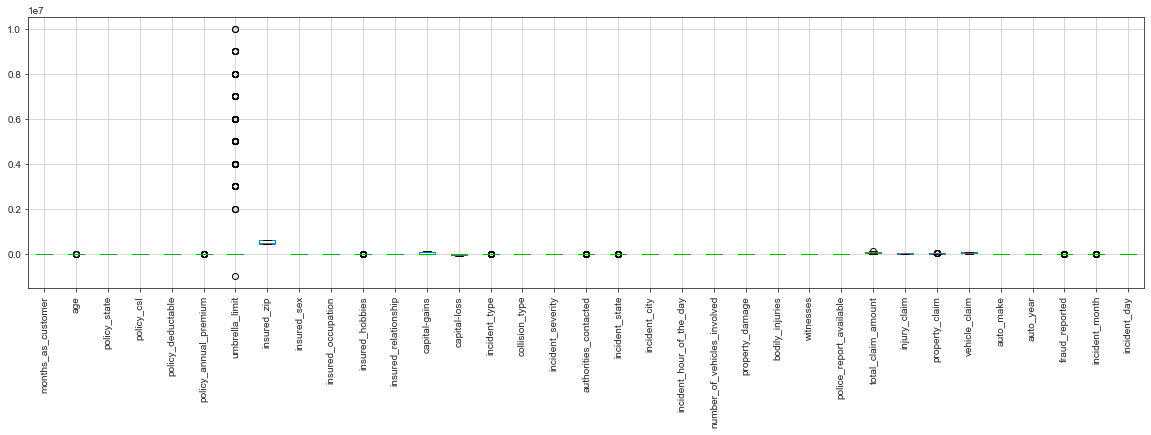

In [73]:
df.boxplot( rot = 90, figsize=(20,5))

We can see that there are few outliers however these might be due to the variation in insuaance amount, tenure etc.

In [74]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['insured_education_level'] = labelencoder.fit_transform(df["insured_education_level"])

### Predictive Modelling

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Splitting data for validation**

In [76]:
X=df.drop(['fraud_reported'], axis=1)
y=df['fraud_reported']

In [77]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [78]:
print(X_train.shape, y_train.shape)

(700, 35) (700,)


**-----> Checking Accuracies**

In [79]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)


model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_test)

model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)

model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)

In [80]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the Logistic Regression is 0.7266666666666667
The accuracy of the Decision Tree is  0.76
The accuracy of the  K-Nearest Neighbours is  0.71
The accuracy of the Linear Support Vector Machine is  0.7266666666666667
The accuracy of the  Random Forest is  0.7833333333333333
The accuracy of the  Gaussian Naive Bayes is  0.68


**-----> Checking Cross Validation Scores**

In [81]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [82]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(model_log,X,y,cv=5)
scr2=cross_val_score(model_tree,X,y,cv=5)
scr3=cross_val_score(model_knn,X,y,cv=5)
scr4=cross_val_score(model_svm_l,X,y,cv=5)
scr5=cross_val_score(model_random,X,y,cv=5)
scr6=cross_val_score(model_gaus,X,y,cv=5)

In [83]:
print("Cross Validation Score of Logistic Regression Model:", scr1.mean())
print("Cross Validation Score of Decision Tree Model:", scr2.mean())
print("Cross Validation Score of K-Nearest Neighbours Model:", scr3.mean())
print("Cross Validation Score of Linear Support Vector Machine Model:", scr4.mean())
print("Cross Validation Score of Random Forest Model:", scr5.mean())
print("Cross Validation Score of Gaussian Naive Bayes Model:", scr6.mean())

Cross Validation Score of Logistic Regression Model: 0.747
Cross Validation Score of Decision Tree Model: 0.7859999999999999
Cross Validation Score of K-Nearest Neighbours Model: 0.7050000000000001
Cross Validation Score of Linear Support Vector Machine Model: 0.7470000000000001
Cross Validation Score of Random Forest Model: 0.818
Cross Validation Score of Gaussian Naive Bayes Model: 0.6709999999999999



---> We can see that the difference between Accuracy and Cross Validation Score is almost the same for all the models.

### Hyper Parameter Tuning

**---> Random Forest Model**

In [84]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  3.7min finished


0.826
RandomForestClassifier(n_estimators=900, random_state=0)


In [85]:
gd.best_params_

{'n_estimators': 900}

In [86]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0

**--->Logistic Regression**

In [87]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7529999999999999


**--->Decision Tree Model**

In [88]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [89]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [90]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001965B3DEE20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001965962F100>})

In [91]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.827


We can see that the Random Forest Model got the least RMSE score and best accuracy of 0.826 in these three hypertuned models.

### Predictions

In [92]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
521,0,0
737,0,0
740,0,0
660,0,0
411,0,0


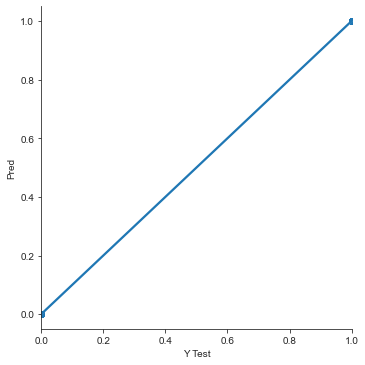

In [93]:
OutputDF = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=OutputDF,palette='rainbow')

### Saving the Model

In [94]:
import joblib

In [95]:
joblib.dump(model_random, 'insurance_claim_fraud_detection.pkl')

['insurance_claim_fraud_detection.pkl']

In [96]:
# Load the model from the file
model_random_from_joblib = joblib.load('insurance_claim_fraud_detection.pkl')

In [97]:
# Use the loaded model to make predictions
model_random_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], d